#### Importing Libraries

In [47]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn.datasets as datasets
import warnings
warnings.filterwarnings('ignore')

#### Reading Data 

In [48]:
data=pd.read_csv('C:/Users/acer 1/Downloads/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [49]:
data.shape

(9994, 13)

In [51]:
data.info() #no null values present in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Checking for Null values

In [52]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Summary of Numerical Features

In [53]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
data.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [54]:
data['Postal Code']=data['Postal Code'].astype("object") #converting postal code to object data-type

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


#### Finding Unique values

In [56]:
for i in data.columns:
    print('\nColumn:',i)
    print('\nNumber of Categories:',data[i].value_counts().count())
    print(data[i].value_counts())


Column: Ship Mode

Number of Categories: 4
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Column: Segment

Number of Categories: 3
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Column: Country

Number of Categories: 1
United States    9994
Name: Country, dtype: int64

Column: City

Number of Categories: 531
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

Column: State

Number of Categories: 49
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michiga

In [57]:
num_col=data.select_dtypes(np.number).columns
print('Numerical Columns are:',num_col)

Numerical Columns are: Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [58]:
cat_col=data.select_dtypes('object').columns
print('Categorial Columns are:',cat_col)

Categorial Columns are: Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category'],
      dtype='object')


#### Plotting the Data with the help of various graphs

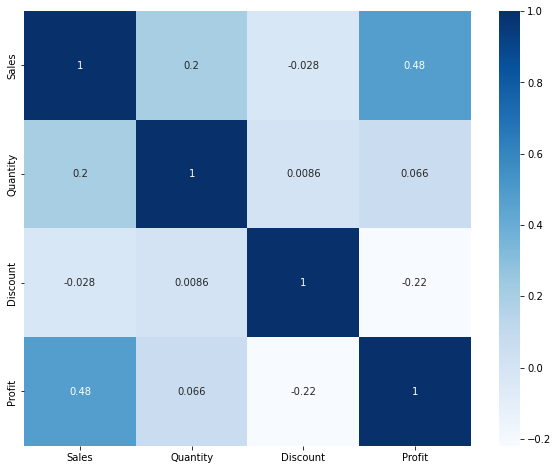

In [59]:
cor=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.show()

In [64]:
# profit & sales - positive correlation
# discount & profit - negative correlation

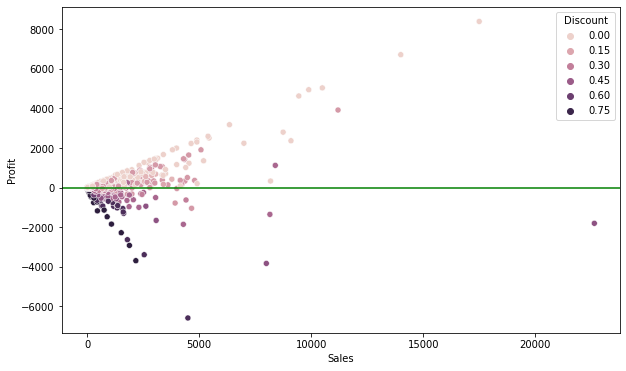

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['Sales'],data['Profit'],hue=data['Discount'])
plt.axhline(0,0,color='g')
plt.show()

In [65]:
# sales & profit - weak positive correlation
# discount & profit - high negative correlation

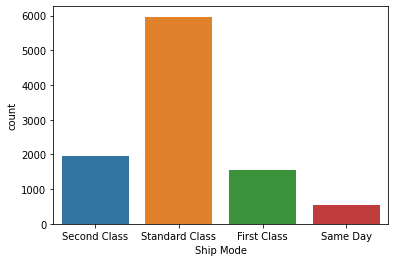

In [61]:
sns.countplot(x=data['Ship Mode'])
plt.show()

In [66]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [68]:
# Standard class mode has highest shipment
# Same day mode has lowest shipment

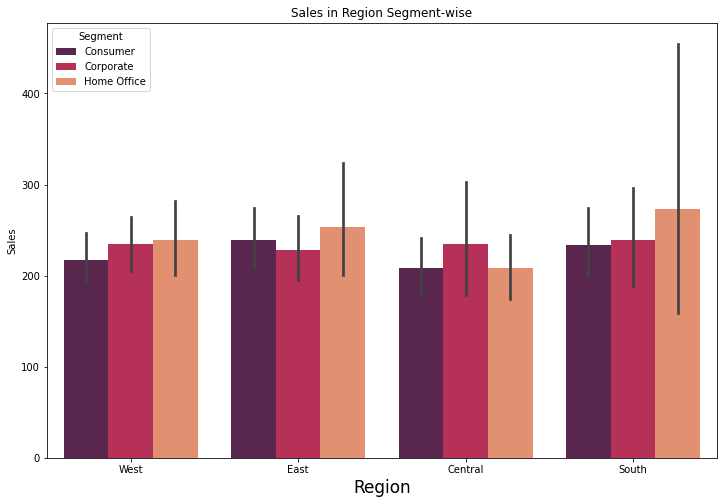

In [67]:
plt.figure(figsize=(12,8))
plt.title('Sales in Region Segment-wise')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=17)
plt.show()

In [69]:
# Segment-wise sales are almost equal in every region.

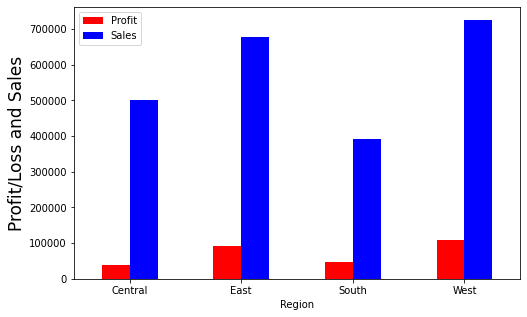

In [70]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['r','b'],figsize=(8,5))
plt.ylabel('Profit/Loss and Sales',fontsize=17)
plt.xticks(rotation=0)
plt.show()

In [71]:
# Profit and Sales are maximum in West region
# Profit and Sales are minimum in South region

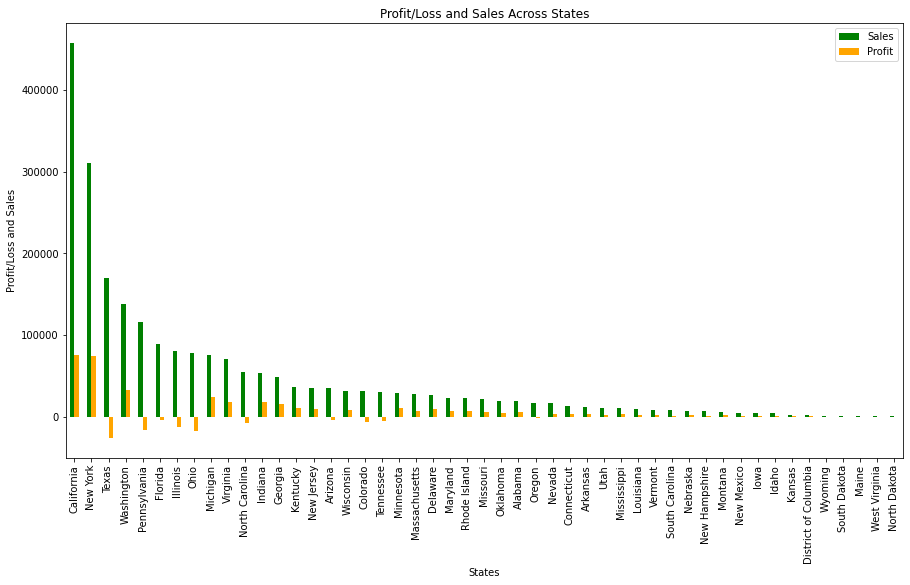

In [72]:
x=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
x[:].plot.bar(color=['green','orange'],figsize=(15,8))
plt.title('Profit/Loss and Sales Across States')
plt.ylabel('Profit/Loss and Sales')
plt.xlabel('States')
plt.show()

In [73]:
# High profit in California
# loss is maximum in Texas

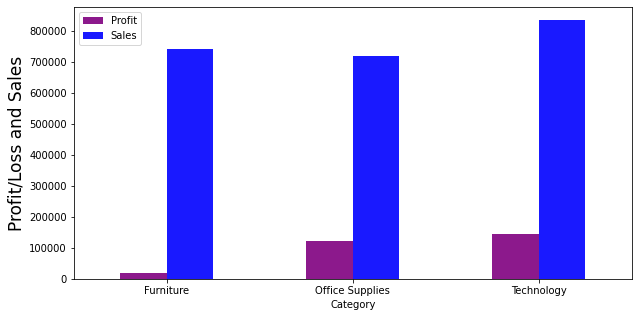

In [74]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['purple','b'],alpha=0.9,figsize=(10,5))
plt.ylabel('Profit/Loss and Sales',fontsize=17)
plt.xticks(rotation=0)
plt.show()

In [75]:
# Technology and Office Supplies have high profit whereas furniture have very low profit value

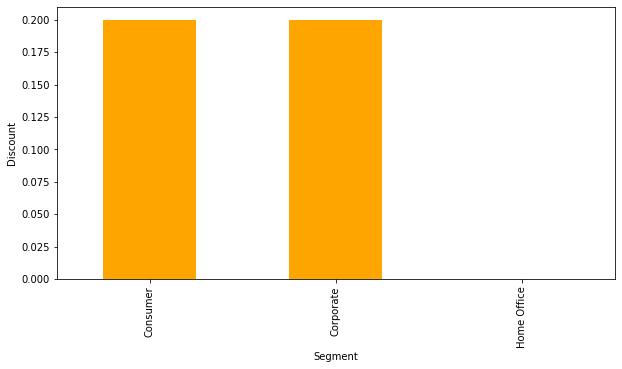

In [76]:
data.groupby('Segment')['Discount'].median().plot(kind='bar',color=['orange'],figsize=(10,5))
plt.ylabel('Discount')
plt.show()

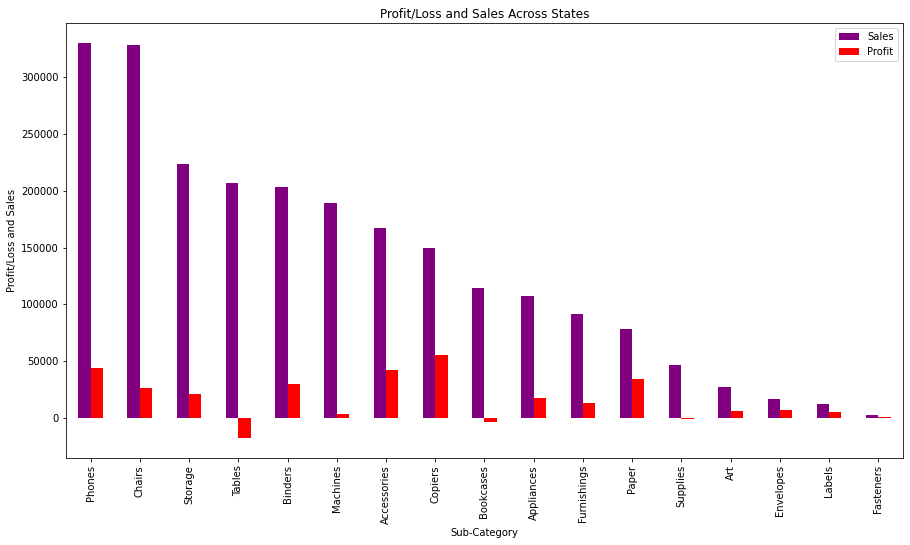

In [77]:
x=data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
x[:].plot.bar(color=['purple','red'],figsize=(15,8))
plt.title('Profit/Loss and Sales Across States')
plt.ylabel('Profit/Loss and Sales')
plt.xlabel('Sub-Category')
plt.show()

In [78]:
# Phone and chair sub-category have highest sales but phones have more profit
# Tables have negative profit